<a href="https://colab.research.google.com/github/c-mmonteiro/t1-algo-feature/blob/main/Trabaho1_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de Feature Enginearing
Disciplina: Algoritmos Baseados em Dados para Problemas de Ciência e Engenharia.

Aluno: Carlos A M Monteiro

# 1. Conjunto de Dados

Gera dados aleatórios e corelacionados para estudo das ferramentas.

In [1]:
import torch as tc
import pandas as pd
import numpy as np

num_amostras = 5000


dados = pd.DataFrame()
dados['x1'] = 6 + tc.randn(num_amostras)
dados['x2'] = [1.5*np.sin(0.002*idx) + n for idx, n in enumerate(dados['x1'])]
dados['x3'] = [0.001*idx+n for idx, n in enumerate(dados['x1'])]
dados['x4'] = [abs(n*np.sin(0.0025*idx))  for idx, n in enumerate(dados['x1'])]
dados['x5'] = [n + float(tc.randn(1)) for idx, n in enumerate(dados['x1'])]
dados['x6'] = [0.0003*idx + 0.8*np.sin(0.0008*idx) + n + float(tc.randn(1)) for idx, n in enumerate(dados['x1'])]
dados['x7'] = tc.rand(num_amostras)
dados['x8'] = [-np.log(n) for idx, n in enumerate(dados['x7'])]
dados['y'] = [10 + n*np.sin(0.0025*idx) + dados['x7'][idx]*np.sin(0.001*idx) + float(tc.randn(1)) for idx, n in enumerate(dados['x1'])]

dados

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,6.181355,6.181355,6.181355,0.000000,6.585087,6.556364,0.366570,1.003565,10.328428
1,7.992050,7.995050,7.993050,0.019980,8.801484,8.794166,0.204780,1.585820,10.525494
2,6.419316,6.425316,6.421316,0.032096,6.467259,8.317806,0.906991,0.097623,9.457669
3,6.214640,6.223640,6.217640,0.046609,8.116279,7.657836,0.523712,0.646814,10.439435
4,7.865228,7.877228,7.869228,0.078651,6.726988,8.987712,0.583988,0.537874,10.461926
...,...,...,...,...,...,...,...,...,...
4995,6.464825,5.661420,11.459825,0.509356,6.810935,7.596916,0.826574,0.190466,10.012068
4996,5.641376,4.835439,10.637376,0.430417,5.703375,6.274112,0.731678,0.312415,8.084395
4997,5.391468,4.583002,10.388468,0.397909,6.475129,6.379530,0.728592,0.316641,8.753786
4998,5.929442,5.118452,10.927442,0.422829,6.454392,8.663695,0.949054,0.052289,7.570869


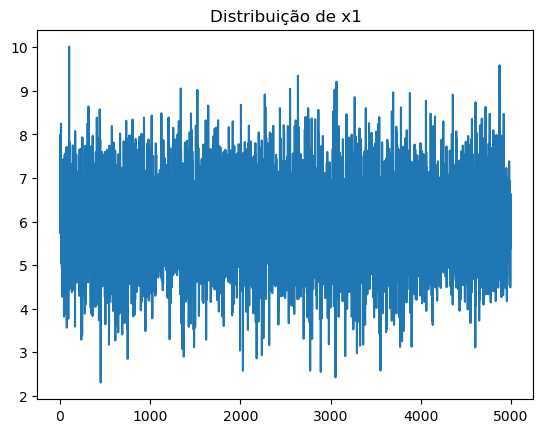

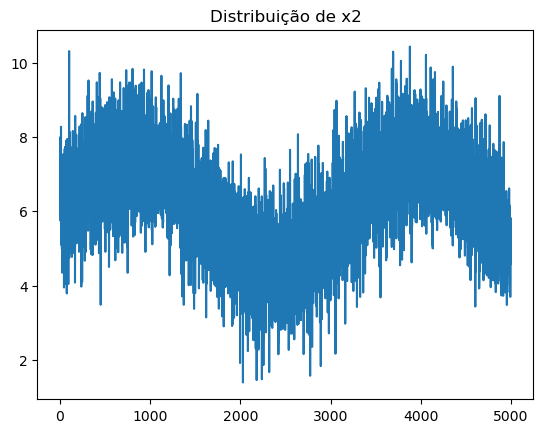

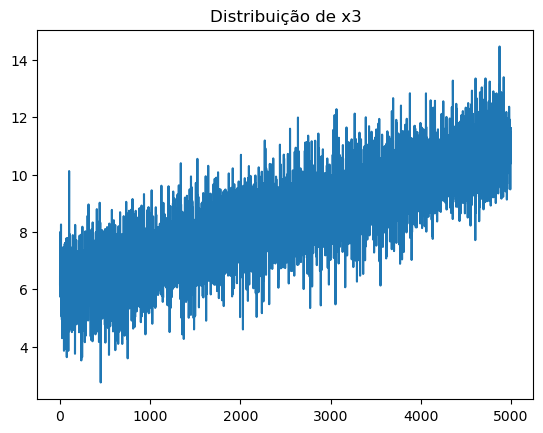

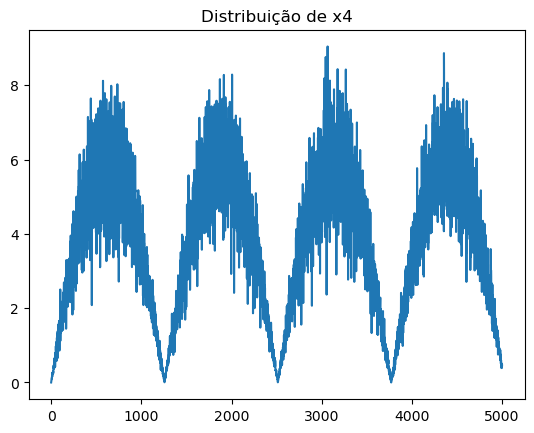

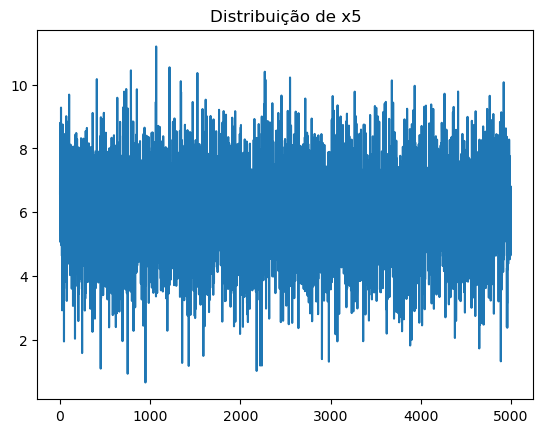

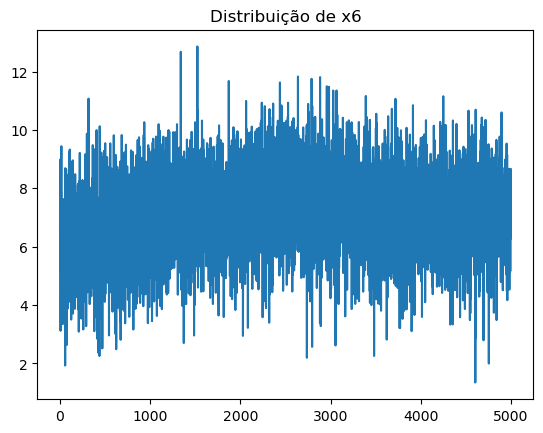

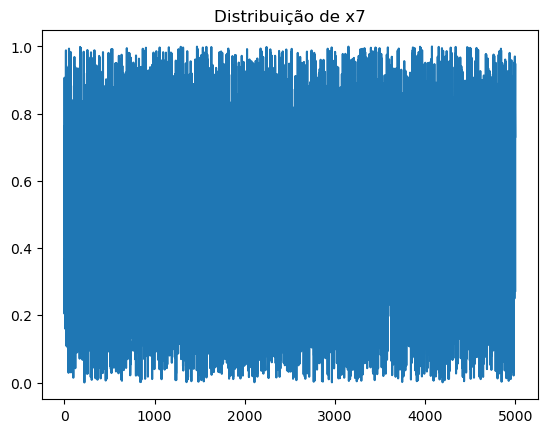

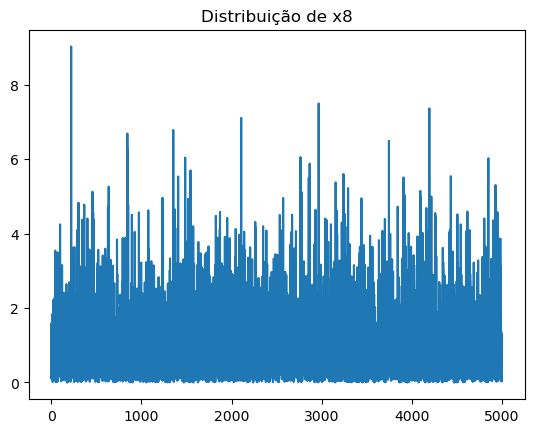

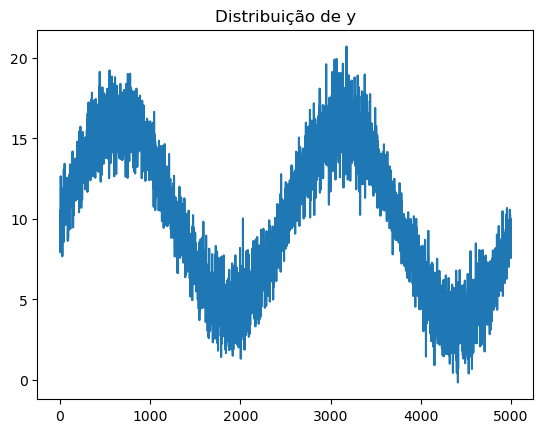

In [2]:
from matplotlib import pyplot as plt

for d in dados.columns:
  plt.figure()
  plt.title(f'Distribuição de {d}')
  dados[d].plot()
  plt.show()

## 1.2 Gráficos dos dados em relação a saída

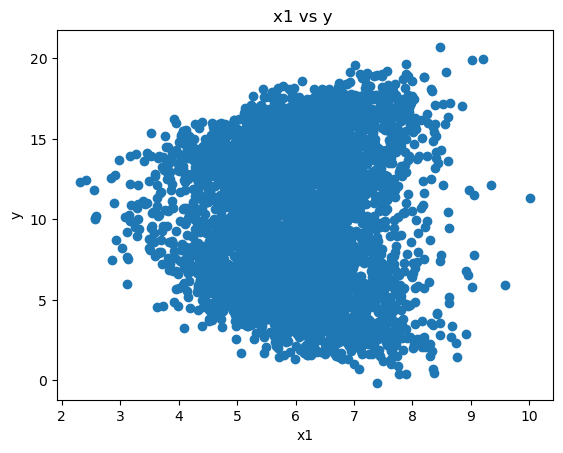

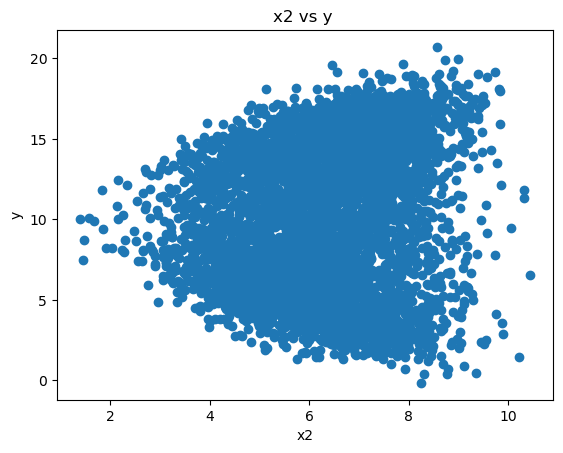

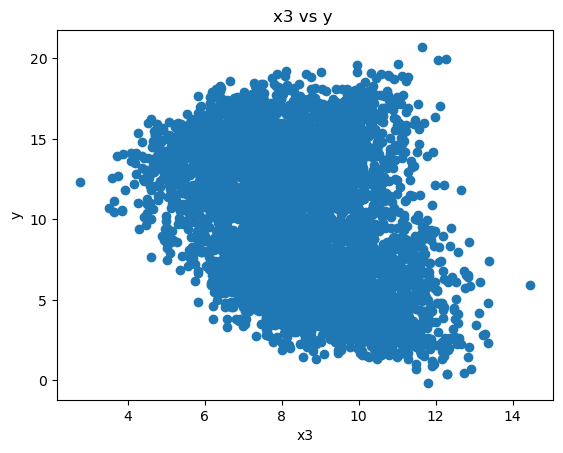

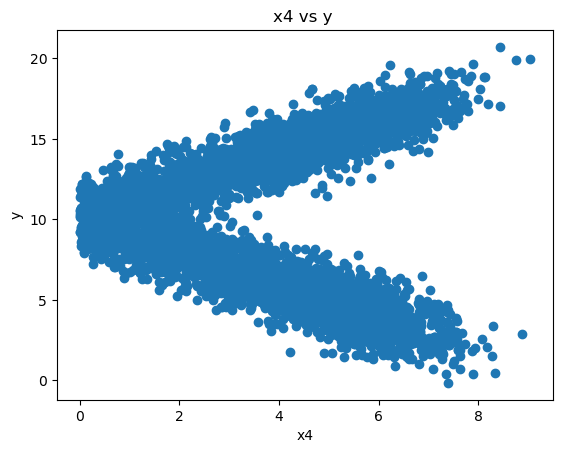

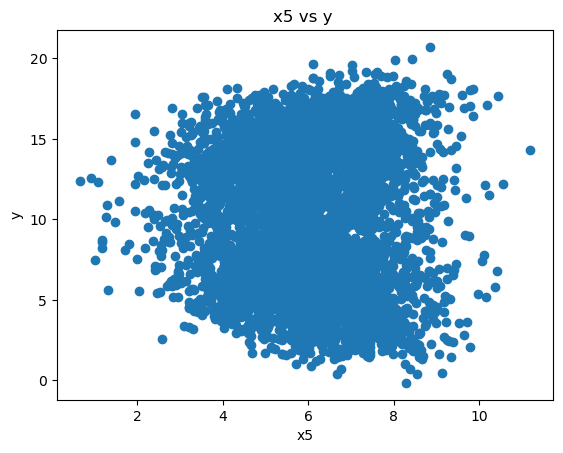

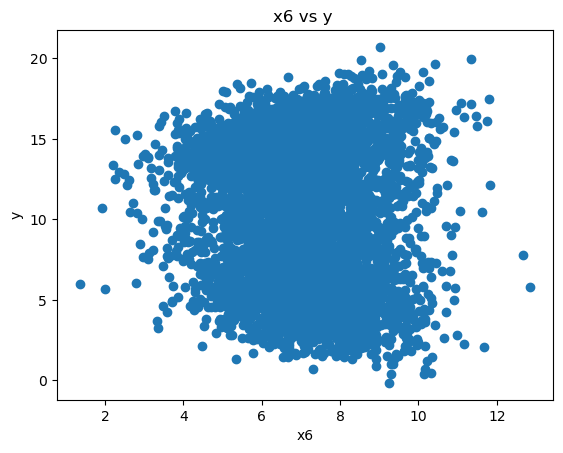

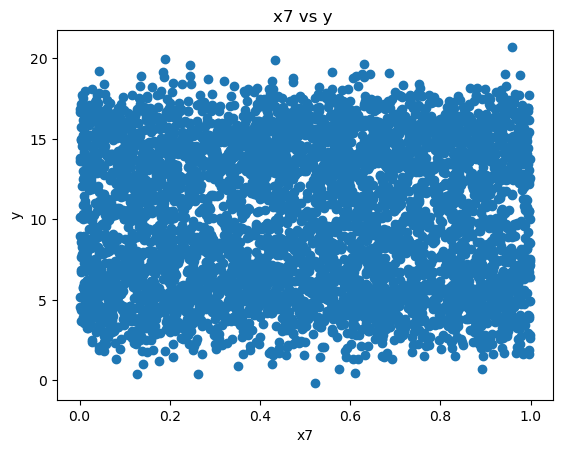

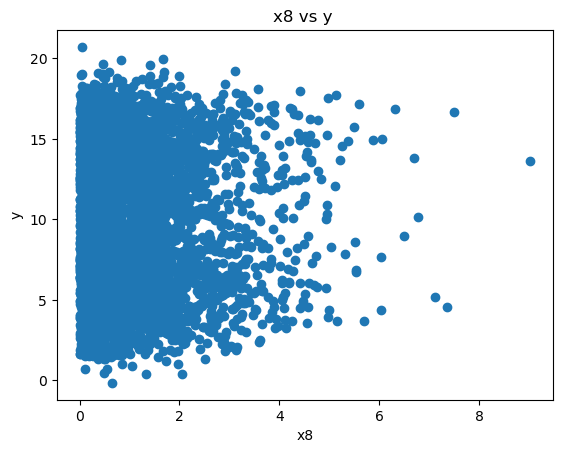

In [3]:
from matplotlib import pyplot as plt
colunas = dados.columns[:-1]
y_col = dados.columns[-1]

for idx, col in enumerate(colunas):
    plt.plot(dados[col], dados[y_col], 'o')
    plt.title(f'{col} vs {y_col} ')
    plt.xlabel(col)
    plt.ylabel(y_col)
    plt.show()

## 1.3 Histograma dos dados

In [4]:
def determina_bins(x, bins_rule = 'fd'):
    if bins_rule == 'classic':
        bins = int(len(x)**0.5)
    elif bins_rule == 'sturges':
        bins = int(np.ceil(np.log2(len(x)) + 1))
    elif bins_rule == 'scott': #ótima para distribuição normal
        bins = int((np.max(x) - np.min(x)) / (3.5 * np.std(x) * len(x)**(-1/3)))
    elif bins_rule == 'fd': #mais robusta para outliers
        bins = int((np.max(x) - np.min(x)) / (2 * (np.percentile(x, 75) - np.percentile(x, 25)) * len(x)**(-1/3)))

    return bins

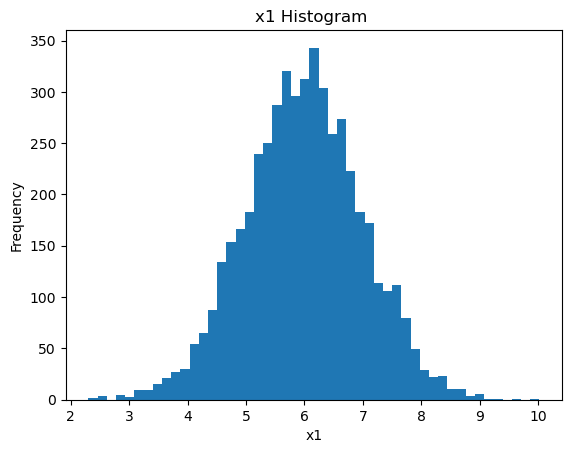

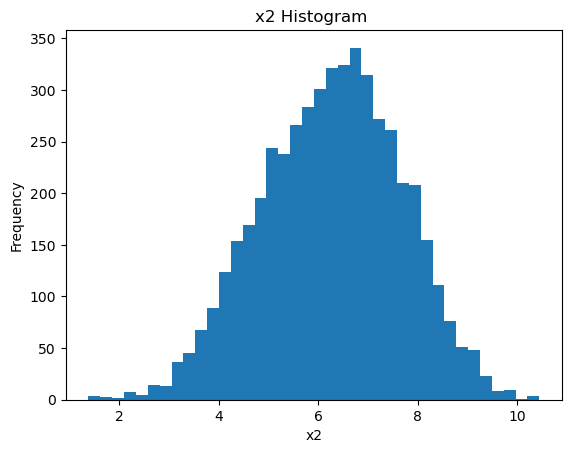

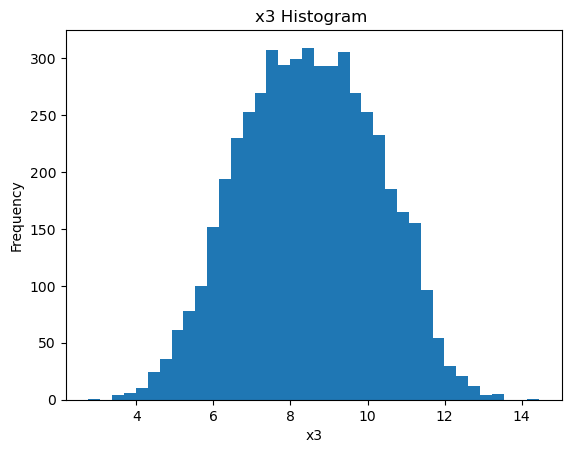

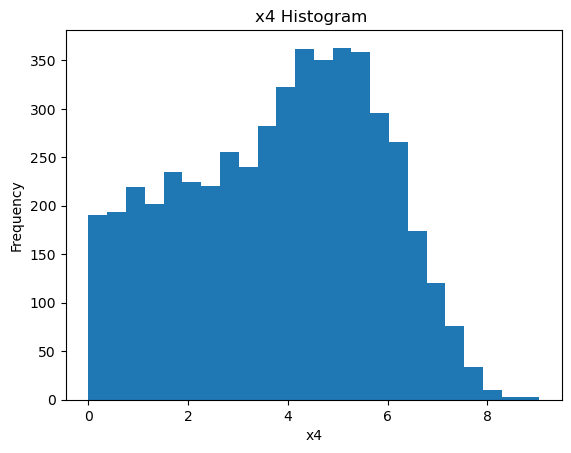

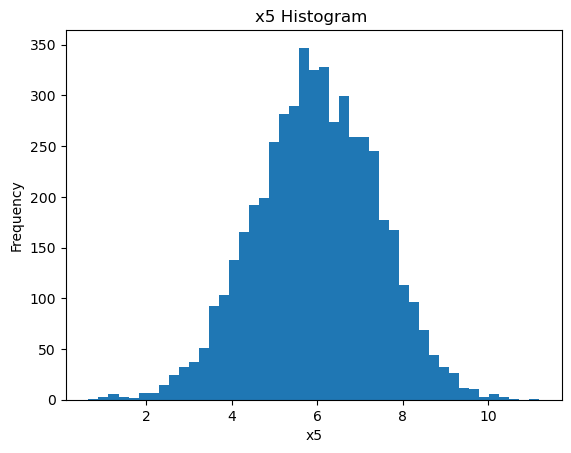

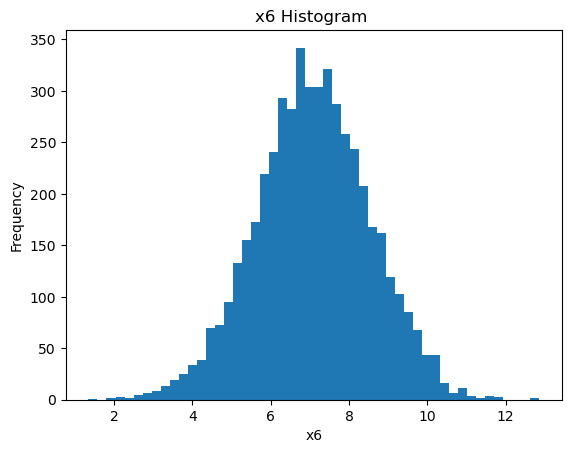

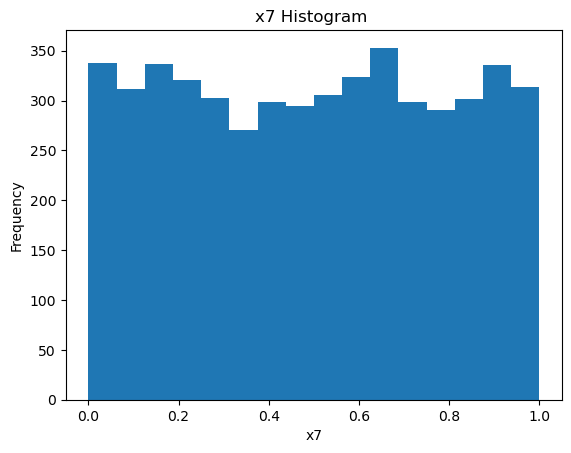

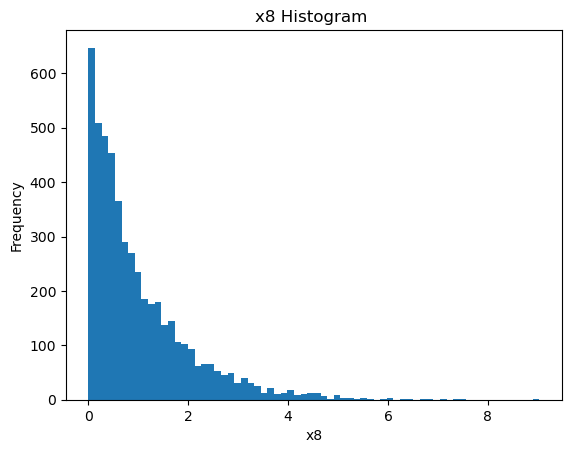

In [5]:
from matplotlib import pyplot as plt

for idx, col in enumerate(dados.columns[:-1]):
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'{col} Histogram ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  2. Modificações nos dados

## 2.1 Converte os dados para distribuição

In [6]:
import numpy as np
import bisect

def converte_bins(x):
    '''
    Converte a coluna x em bins discretos.
    Parâmetros:
    x: array-like, coluna a ser convertida.
    bins: int, número de bins.
    Retorna:
    array-like, coluna
    '''
    edge = np.linspace(x.min(), x.max(), determina_bins(x)+1)

    x_bins = []
    for xi in x:
      x_bins.append(bisect.bisect_left(edge, xi))
    return x_bins

In [7]:
dados_bins = pd.DataFrame()
for col in dados.columns[:-1]:
    dados_bins['b'+col] = converte_bins(dados[col])
dados_bins

,bx1,bx2,bx3,bx4,bx5,bx6,bx7,bx8
0,25,21,12,0,26,23,6,8
1,37,28,18,1,35,33,4,12
2,27,22,12,1,25,31,15,1
3,25,21,12,1,32,28,9,5
4,36,28,17,1,26,34,10,5
...,...,...,...,...,...,...,...,...
4995,27,18,29,2,27,28,14,2
4996,22,15,26,2,22,22,12,3
4997,20,14,25,2,25,22,12,3
4998,24,16,27,2,25,32,16,1


# 2.2 Transformações

In [8]:

!pip install optuna

Primeiramente determina-se o valor de alpha por meio do Optuna e depois aplica a transformação x' = x**alpha.



In [9]:
from scipy.stats import shapiro
import optuna as opt

opt.logging.set_verbosity(opt.logging.CRITICAL)

def objective(trial, col_idx):
    col = dados.columns[col_idx]
    alpha = trial.suggest_float('alpha', -1.0, 1.0)
    coluna_modificada = dados[col]
    try:
        dados_transf = coluna_modificada**alpha
        if np.any(np.isnan(dados_transf)) or np.any(np.isinf(dados_transf)):
            return -np.inf  # penaliza soluções inválidas
        stat, p = shapiro(dados_transf)
        return stat
    except Exception:
        return -np.inf

print(f'  Coluna  | Alfa')
print(f'----------|-------------')
parametro_alpha_transformacao = []
for idx in range(len(dados.columns)-1):
    study = opt.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, idx), n_trials=100, show_progress_bar=False)
    print(f'{dados.columns[idx].center(9)} | {study.best_params["alpha"]:.3f}')
    parametro_alpha_transformacao.append(np.float64(study.best_params["alpha"]))

  Coluna  | Alfa
----------|-------------
    x1    | 1.000
    x2    | 1.000
    x3    | 0.962
    x4    | 1.000
    x5    | 0.999
    x6    | 0.999
    x7    | 0.804
    x8    | 0.270


In [10]:
dados_transformados = pd.DataFrame()
for idx, col in enumerate(colunas):
    dados_transformados['t'+col] = np.power(dados[col], parametro_alpha_transformacao[idx])

In [11]:
dados_transformados.isna().sum()

tx1    0
tx2    0
tx3    0
tx4    0
tx5    0
tx6    0
tx7    0
tx8    0
dtype: int64

Mostrar os histogramas originais e dos dados transformados

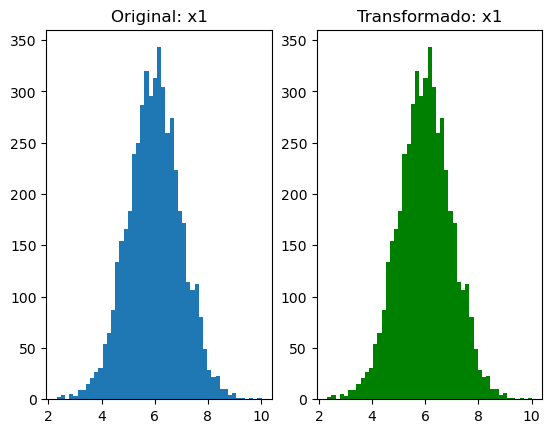

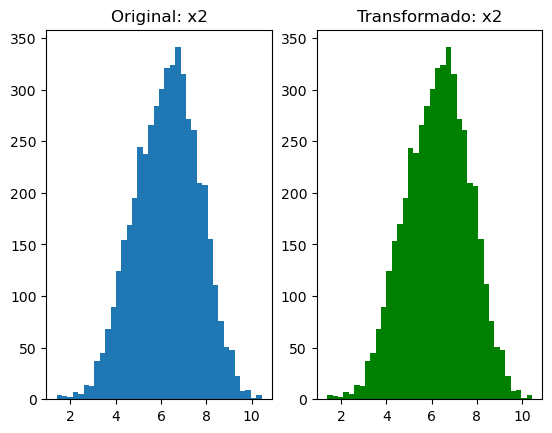

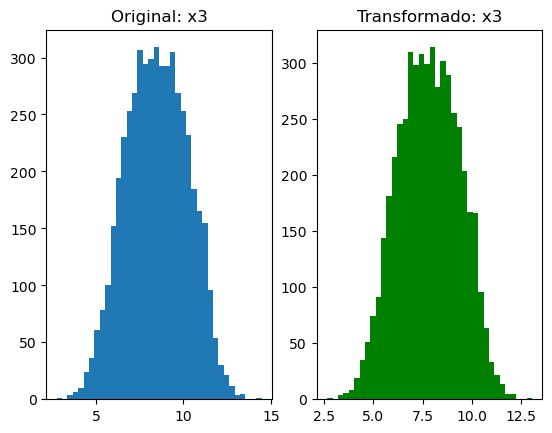

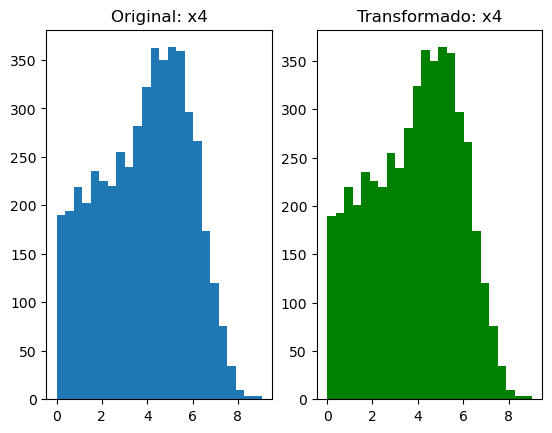

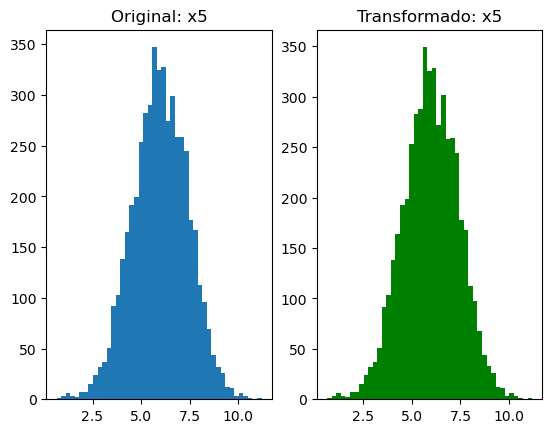

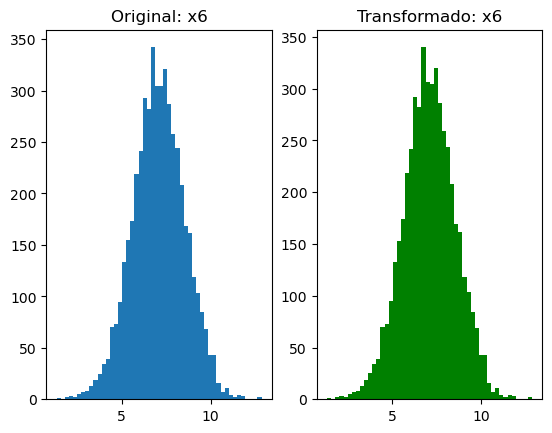

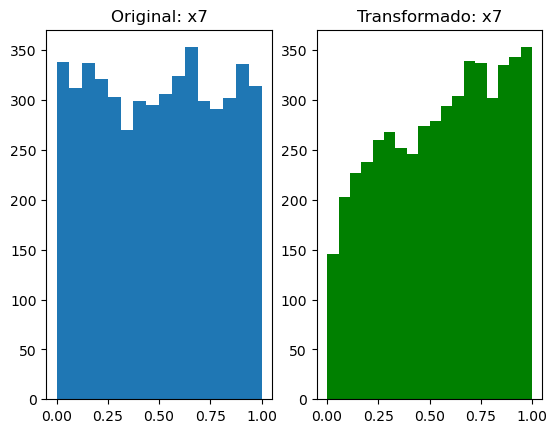

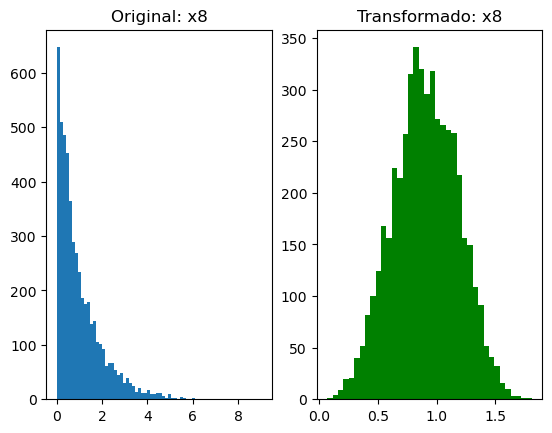

In [12]:
# Exemplo: mostrar histogramas antes e depois da transformação para cada coluna
import matplotlib.pyplot as plt

for idx in range(len(dados.columns)-1):
    col = dados.columns[idx]

    plt.subplot(1, 2, 1)
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'Original: {col}')
    plt.subplot(1, 2, 2)
    plt.hist(dados_transformados['t'+col], bins=determina_bins(dados_transformados['t'+col]), color= 'g')
    plt.title(f'Transformado: {col}')
    plt.show()

## 2.3 Cria interações entre os dados

Aqui serão criadas interações entre os dados originais (apenas entre eles), entre os dados transformados em 2.2 (apenas entre eles) e entre os dados transformado em bins em 2.1 (apenas entre eles).

As interações a serem feitas são de multiplicação e potencia (até a 3), utilizando PolynomialFeatures do Sklearn.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
dados_inter = pd.DataFrame(poly.fit_transform(dados[dados.columns[:-1]]))
dados_inter.columns = poly.get_feature_names_out()

dados_inter

,x1,x2,x3,x4,x5,x6,x7,x8,x1^2,x1 x2,...,x6^3,x6^2 x7,x6^2 x8,x6 x7^2,x6 x7 x8,x6 x8^2,x7^3,x7^2 x8,x7 x8^2,x8^3
0,6.181355,6.181355,6.181355,0.000000,6.585087,6.556364,0.366570,1.003565,38.209156,38.209156,...,281.831300,15.757361,43.139149,0.881004,2.411936,6.603192,0.049257,0.134853,0.369189,1.010733
1,7.992050,7.995050,7.993050,0.019980,8.801484,8.794166,0.204780,1.585820,63.872866,63.896842,...,680.117489,15.837123,122.643142,0.368781,2.855851,22.115797,0.008587,0.066501,0.514985,3.988062
2,6.419316,6.425316,6.421316,0.032096,6.467259,8.317806,0.906991,0.097623,41.207616,41.246131,...,575.474882,62.750983,6.754122,6.842498,0.736484,0.079270,0.746120,0.080308,0.008644,0.000930
3,6.214640,6.223640,6.217640,0.046609,8.116279,7.657836,0.523712,0.646814,38.621746,38.677678,...,449.074272,30.711730,37.930770,2.100344,2.594047,3.203798,0.143640,0.177404,0.219104,0.270607
4,7.865228,7.877228,7.869228,0.078651,6.726988,8.987712,0.583988,0.537874,61.861807,61.956188,...,726.018130,47.173988,43.448908,3.065192,2.823150,2.600221,0.199165,0.183438,0.168953,0.155611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.464825,5.661420,11.459825,0.509356,6.810935,7.596916,0.826574,0.190466,41.793964,36.600091,...,438.441757,47.704168,10.992381,5.190399,1.196014,0.275595,0.564736,0.130131,0.029986,0.006910
4996,5.641376,4.835439,10.637376,0.430417,5.703375,6.274112,0.731678,0.312415,31.825118,27.278526,...,246.977198,28.802109,12.298071,3.358859,1.434183,0.612375,0.391705,0.167252,0.071414,0.030493
4997,5.391468,4.583002,10.388468,0.397909,6.475129,6.379530,0.728592,0.316641,29.067923,24.709108,...,259.636670,29.652548,12.886772,3.386554,1.471771,0.639620,0.386771,0.168088,0.073050,0.031747
4998,5.929442,5.118452,10.927442,0.422829,6.454392,8.663695,0.949054,0.052289,35.158287,30.349564,...,650.293604,71.235649,3.924812,7.803425,0.429939,0.023688,0.854817,0.047097,0.002595,0.000143


In [14]:
poly = PolynomialFeatures(degree=3, include_bias=False)
dados_transformados_inter = pd.DataFrame(poly.fit_transform(dados_transformados))
dados_transformados_inter.columns = poly.get_feature_names_out()

dados_transformados_inter

,tx1,tx2,tx3,tx4,tx5,tx6,tx7,tx8,tx1^2,tx1 tx2,...,tx6^3,tx6^2 tx7,tx6^2 tx8,tx6 tx7^2,tx6 tx7 tx8,tx6 tx8^2,tx7^3,tx7^2 tx8,tx7 tx8^2,tx8^3
0,6.181088,6.179121,5.765919,0.000000,6.576549,6.550152,0.446263,1.000962,38.205854,38.193694,...,281.030998,19.146693,42.945767,1.304468,2.925903,6.562760,0.088874,0.199342,0.447122,1.002888
1,7.991656,7.991752,7.383015,0.020001,8.788316,8.784533,0.279440,1.132673,63.866570,63.867336,...,677.885096,21.563811,87.406143,0.685954,2.780426,11.270102,0.021820,0.088447,0.358507,1.453161
2,6.419033,6.422944,5.981045,0.032126,6.458953,8.308929,0.924514,0.533331,41.203979,41.229086,...,573.634271,63.826887,36.820297,7.101862,4.096905,2.363412,0.790207,0.455853,0.262971,0.151702
3,6.214370,6.221382,5.798468,0.046648,8.104588,7.649982,0.594505,0.888948,38.618398,38.661969,...,447.693909,34.791753,52.023223,2.703781,4.042894,6.045237,0.210120,0.314186,0.469795,0.702473
4,7.864843,7.874001,7.272978,0.078705,6.718167,8.977769,0.648924,0.845737,61.855754,61.927783,...,723.611251,52.303466,68.166691,3.780556,4.927168,6.421539,0.273263,0.356141,0.464156,0.604931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.464539,5.659472,10.440542,0.509450,6.801946,7.589154,0.858017,0.638883,41.790265,36.585881,...,437.099356,49.417742,36.796623,5.587089,4.160166,3.097674,0.631667,0.470342,0.350218,0.260774
4996,5.641144,4.833926,9.718850,0.430515,5.696544,6.268307,0.777885,0.730276,31.822509,27.268877,...,246.292259,30.564422,28.693759,3.792989,3.560843,3.342906,0.470703,0.441894,0.414849,0.389458
4997,5.391252,4.581618,9.500022,0.398008,6.466808,6.373573,0.775247,0.732931,29.065599,24.700655,...,258.910099,31.492442,29.773457,3.830573,3.621484,3.423809,0.465930,0.440498,0.416454,0.393722
4998,5.929192,5.116793,9.973616,0.422928,6.446112,8.654271,0.958832,0.450548,35.155319,30.338449,...,648.173755,71.813057,33.744421,7.956378,3.738643,1.756760,0.881510,0.414215,0.194637,0.091458


Também serão feitas as interações de soma entre 2 atributos e de max(a,b) para os mesmos conjuntos de dados, entre eles, como descrito acima. Este já são adicionados ao dataframe das interações polinomiais.

In [16]:
len_dados = len(dados.columns)-1
for idx1 in range(len_dados):
  for idx2 in range(idx1+1, len_dados):
    col1 = dados.columns[idx1]
    col2 = dados.columns[idx2]
    dados_inter[f'{col1}+{col2}'] = dados[col1] + dados[col2]
    dados_inter[f'max({col1},{col2})'] = np.maximum(dados[col1], dados[col2])
dados_inter

,x1,x2,x3,x4,x5,x6,x7,x8,x1^2,x1 x2,...,x5+x7,"max(x5,x7)",x5+x8,"max(x5,x8)",x6+x7,"max(x6,x7)",x6+x8,"max(x6,x8)",x7+x8,"max(x7,x8)"
0,6.181355,6.181355,6.181355,0.000000,6.585087,6.556364,0.366570,1.003565,38.209156,38.209156,...,6.951658,6.585087,7.588652,6.585087,6.922935,6.556364,7.559929,6.556364,1.370135,1.003565
1,7.992050,7.995050,7.993050,0.019980,8.801484,8.794166,0.204780,1.585820,63.872866,63.896842,...,9.006264,8.801484,10.387305,8.801484,8.998946,8.794166,10.379986,8.794166,1.790600,1.585820
2,6.419316,6.425316,6.421316,0.032096,6.467259,8.317806,0.906991,0.097623,41.207616,41.246131,...,7.374250,6.467259,6.564881,6.467259,9.224797,8.317806,8.415429,8.317806,1.004614,0.906991
3,6.214640,6.223640,6.217640,0.046609,8.116279,7.657836,0.523712,0.646814,38.621746,38.677678,...,8.639990,8.116279,8.763093,8.116279,8.181548,7.657836,8.304650,7.657836,1.170526,0.646814
4,7.865228,7.877228,7.869228,0.078651,6.726988,8.987712,0.583988,0.537874,61.861807,61.956188,...,7.310976,6.726988,7.264862,6.726988,9.571701,8.987712,9.525586,8.987712,1.121862,0.583988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.464825,5.661420,11.459825,0.509356,6.810935,7.596916,0.826574,0.190466,41.793964,36.600091,...,7.637509,6.810935,7.001401,6.810935,8.423490,7.596916,7.787381,7.596916,1.017040,0.826574
4996,5.641376,4.835439,10.637376,0.430417,5.703375,6.274112,0.731678,0.312415,31.825118,27.278526,...,6.435053,5.703375,6.015791,5.703375,7.005790,6.274112,6.586528,6.274112,1.044093,0.731678
4997,5.391468,4.583002,10.388468,0.397909,6.475129,6.379530,0.728592,0.316641,29.067923,24.709108,...,7.203722,6.475129,6.791770,6.475129,7.108122,6.379530,6.696171,6.379530,1.045233,0.728592
4998,5.929442,5.118452,10.927442,0.422829,6.454392,8.663695,0.949054,0.052289,35.158287,30.349564,...,7.403446,6.454392,6.506681,6.454392,9.612749,8.663695,8.715984,8.663695,1.001344,0.949054


In [17]:
len_dados_transformados = len(dados_transformados.columns)
for idx1 in range(len_dados_transformados):
  for idx2 in range(idx1+1, len_dados_transformados):
    col1 = dados_transformados.columns[idx1]
    col2 = dados_transformados.columns[idx2]
    dados_transformados_inter[f'{col1}+{col2}'] = dados_transformados[col1] + dados_transformados[col2]
    dados_transformados_inter[f'max({col1},{col2})'] = np.maximum(dados_transformados[col1], dados_transformados[col2])
dados_transformados_inter

,tx1,tx2,tx3,tx4,tx5,tx6,tx7,tx8,tx1^2,tx1 tx2,...,tx5+tx7,"max(tx5,tx7)",tx5+tx8,"max(tx5,tx8)",tx6+tx7,"max(tx6,tx7)",tx6+tx8,"max(tx6,tx8)",tx7+tx8,"max(tx7,tx8)"
0,6.181088,6.179121,5.765919,0.000000,6.576549,6.550152,0.446263,1.000962,38.205854,38.193694,...,7.022812,6.576549,7.577510,6.576549,6.996416,6.550152,7.551114,6.550152,1.447225,1.000962
1,7.991656,7.991752,7.383015,0.020001,8.788316,8.784533,0.279440,1.132673,63.866570,63.867336,...,9.067756,8.788316,9.920989,8.788316,9.063973,8.784533,9.917206,8.784533,1.412113,1.132673
2,6.419033,6.422944,5.981045,0.032126,6.458953,8.308929,0.924514,0.533331,41.203979,41.229086,...,7.383467,6.458953,6.992284,6.458953,9.233443,8.308929,8.842260,8.308929,1.457846,0.924514
3,6.214370,6.221382,5.798468,0.046648,8.104588,7.649982,0.594505,0.888948,38.618398,38.661969,...,8.699093,8.104588,8.993536,8.104588,8.244487,7.649982,8.538930,7.649982,1.483453,0.888948
4,7.864843,7.874001,7.272978,0.078705,6.718167,8.977769,0.648924,0.845737,61.855754,61.927783,...,7.367090,6.718167,7.563904,6.718167,9.626693,8.977769,9.823506,8.977769,1.494661,0.845737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.464539,5.659472,10.440542,0.509450,6.801946,7.589154,0.858017,0.638883,41.790265,36.585881,...,7.659963,6.801946,7.440829,6.801946,8.447172,7.589154,8.228037,7.589154,1.496900,0.858017
4996,5.641144,4.833926,9.718850,0.430515,5.696544,6.268307,0.777885,0.730276,31.822509,27.268877,...,6.474429,5.696544,6.426819,5.696544,7.046192,6.268307,6.998583,6.268307,1.508161,0.777885
4997,5.391252,4.581618,9.500022,0.398008,6.466808,6.373573,0.775247,0.732931,29.065599,24.700655,...,7.242055,6.466808,7.199739,6.466808,7.148821,6.373573,7.106505,6.373573,1.508179,0.775247
4998,5.929192,5.116793,9.973616,0.422928,6.446112,8.654271,0.958832,0.450548,35.155319,30.338449,...,7.404943,6.446112,6.896659,6.446112,9.613103,8.654271,9.104819,8.654271,1.409380,0.958832


# 3. Cálculo das correlações entre os dados de entrada e a saída



## 3.1 Cálculo da *Mutual Information*

Calculo da *Mutual Information* por meio do hitograma. A forma de definir o número de bins pode ser escolhido entre os métodos Classico, Struges, Scoot e Freedman-Diaconis.

In [19]:
def calc_mi(x, y, bins_rule='classic'):
    '''Calcula a Mutual Information entre duas variáveis x e y usando histogramas.
    Parâmetros:
    x: array-like, primeira variável.
    y: array-like, segunda variável.
    bins_rule: str, regra para determinar o número de bins. Opções: 'classic', 'sturges', 'scott', 'fd'.
    Retorna:
    mi: float, valor da Mutual Information.
    '''

    bins_x = determina_bins(x, bins_rule)
    bins_y = determina_bins(y, bins_rule)

    hist2d, x_edges, y_edges = np.histogram2d(x, y, bins=[bins_x, bins_y])

    hist2d_norm = hist2d / np.sum(hist2d)

    hist_x = np.sum(hist2d_norm, axis=1)
    hist_y = np.sum(hist2d_norm, axis=0)

    entropia_x = -sum(hist_x[hist_x > 0] * np.log(hist_x[hist_x > 0]))
    entropia_y = -sum(hist_y[hist_y > 0] * np.log(hist_y[hist_y > 0]))

    entropia_conjunta = -sum(hist2d_norm[hist2d_norm > 0] * np.log(hist2d_norm[hist2d_norm > 0]))

    mi = entropia_x + entropia_y - entropia_conjunta

    return mi

**Dúvida:** Na minha cabeça faz mais sentido colocar os os métodos de determinação da bin como entrada, pode ser assim?

Testes da Mutual Information utilizando diferentes formas de calcular os bins, apenas para os dados originais.

In [20]:
bins_rule = ['classic', 'sturges', 'scott', 'fd']

print(f'  Teste do Mutual Information com os dados originais\n')
print(f'  Dado   | {bins_rule[0]} | {bins_rule[1]} |  {bins_rule[2]}  |  {bins_rule[3]}')
print(f'---------|---------|---------|---------|--------')
for idx, col in enumerate(dados.columns[:-1]):
    bins_list = []
    for br in bins_rule:
        bins_list.append(calc_mi(dados[col], dados[y_col], bins_rule=br))
    print(f'{col.center(9)}|  {bins_list[0]:.3f}  |  {bins_list[1]:.3f}  |  {bins_list[2]:.3f}  |  {bins_list[3]:.3f}')


  Teste do Mutual Information com os dados originais

  Dado   | classic | sturges |  scott  |  fd
---------|---------|---------|---------|--------
    x1   |  0.359  |  0.084  |  0.136  |  0.149
    x2   |  0.411  |  0.108  |  0.145  |  0.159
    x3   |  0.422  |  0.142  |  0.183  |  0.194
    x4   |  0.925  |  0.645  |  0.692  |  0.691
    x5   |  0.342  |  0.045  |  0.093  |  0.105
    x6   |  0.327  |  0.044  |  0.092  |  0.109
    x7   |  0.459  |  0.023  |  0.035  |  0.035
    x8   |  0.240  |  0.015  |  0.056  |  0.081


Mutual Information, usando Freedman–Diaconis, aplicada aos dados originais, aos dados em bins e aos dados transformados, todos com as suas interações.

In [66]:
print(f'    Dado    | Original | Transformado ')
print(f'------------|----------|--------------')

col_transf = dados_transformados_inter.columns

mi_dados_list = []
mi_transform_list = []

for idx, col in enumerate(dados_inter.columns):
    mi_dados = calc_mi(dados_inter[col], dados['y'], bins_rule='fd')
    mi_transform = calc_mi(dados_transformados_inter[col_transf[idx]], dados['y'], bins_rule='fd')

    mi_dados_list.append(mi_dados)
    mi_transform_list.append(mi_transform)

    print(f'{col.center(12)}|   {mi_dados:.3f}  |     {mi_transform:.3f}    ')

    Dado    | Original | Transformado 
------------|----------|--------------
     x1     |   0.149  |     0.149    
     x2     |   0.159  |     0.158    
     x3     |   0.194  |     0.191    
     x4     |   0.691  |     0.691    
     x5     |   0.105  |     0.106    
     x6     |   0.109  |     0.109    
     x7     |   0.035  |     0.037    
     x8     |   0.081  |     0.067    
    x1^2    |   0.154  |     0.154    
   x1 x2    |   0.166  |     0.165    
   x1 x3    |   0.171  |     0.172    
   x1 x4    |   0.642  |     0.642    
   x1 x5    |   0.132  |     0.132    
   x1 x6    |   0.133  |     0.133    
   x1 x7    |   0.057  |     0.064    
   x1 x8    |   0.090  |     0.079    
    x2^2    |   0.158  |     0.158    
   x2 x3    |   0.166  |     0.166    
   x2 x4    |   0.650  |     0.651    
   x2 x5    |   0.145  |     0.146    
   x2 x6    |   0.153  |     0.154    
   x2 x7    |   0.063  |     0.071    
   x2 x8    |   0.090  |     0.088    
    x3^2    |   0.191  | 

## 3.2 Hilbert-Schmidt Independence Criterion (HSIC)

In [22]:
from sklearn.metrics.pairwise import rbf_kernel

def calc_hsic(x, y, sigma_x = None, sigma_y = None):

    x = np.asarray(x)
    y = np.asarray(y)

    len_x = len(x)

    H = np.eye(len_x) - np.ones((len_x, len_x))/len_x

    if sigma_x is None:
        sigma_x = np.median(np.abs(x[:, None] - x[None, :]))

    if sigma_y is None:
        sigma_y = np.median(np.abs(y[:, None] - y[None, :]))

    K = rbf_kernel(x.reshape(-1, 1), gamma=1/(2*sigma_x**2))
    L = rbf_kernel(y.reshape(-1, 1), gamma=1/(2*sigma_y**2))

    return np.trace(H @ K @ H @ L) / (len_x - 1)**2

**Dúvida:** Na minha cabeça faz mais sentido calcular o sigma para os dados inseridos, pode ser assim?

HSIC aplicada aos dados originais, aos dados em bins e aos dados transformados.

In [ ]:
col_transf = dados_transformados_inter.columns


hsic_dados_list = []
hsic_transform_list = []


print(f'    Dado    | Original | Transformado ')
print(f'------------|----------|--------------')
for idx, col in enumerate(dados_inter.columns):
  hsic_dados = calc_hsic(dados_inter[col], dados['y'])
  hsic_transform = calc_hsic(dados_transformados_inter[col_transf[idx]], dados['y'])

  hsic_dados_list.append(hsic_dados)
  hsic_transform_list.append(hsic_transform)

  print(f'{col.ljust(12)}|  {hsic_dados:.5f} |    {hsic_transform:.5f}   ')


    Dado    | Original | Transformado |    Bins
------------|----------|--------------|--------------
x1          |  0.00165 |    0.00165   |   0.00165  
x2          |  0.00433 |    0.00433   |   0.00430  
x3          |  0.00927 |    0.00927   |   0.00928  
x4          |  0.02092 |    0.02092   |   0.02099  
x5          |  0.00101 |    0.00101   |   0.00102  
x6          |  0.00132 |    0.00132   |   0.00133  
x7          |  0.00007 |    0.00008   |   0.00007  
x8          |  0.00008 |    0.00008   |   0.00008  
x1^2        |  0.00166 |    0.00166   |   0.00167  
x1 x2       |  0.00302 |    0.00302   |   0.00291  
x1 x3       |  0.00496 |    0.00485   |   0.00472  
x1 x4       |  0.01816 |    0.01816   |   0.01630  
x1 x5       |  0.00148 |    0.00148   |   0.00157  
x1 x6       |  0.00155 |    0.00155   |   0.00158  
x1 x7       |  0.00035 |    0.00040   |   0.00051  
x1 x8       |  0.00007 |    0.00031   |   0.00010  
x2^2        |  0.00436 |    0.00436   |   0.00435  
x2 x3       | 

### 3.3. Definição dos mais influentes

Lista os atributos e suas interações com maior corelação com a saída (MI e HSIC separadamente) para cada "conjunto de dados"

In [ ]:
n_maior = 20
col = dados_inter.columns 
    
idx_dados_hsic = np.argpartition(hsic_dados_list, -n_maior)[-n_maior:]
idx_dados_transform_hsic = np.argpartition(hsic_transform_list, -n_maior)[-n_maior:]

idx_dados_mi = np.argpartition(mi_dados_list, -n_maior)[-n_maior:]
idx_dados_transform_mi = np.argpartition(mi_transform_list, -n_maior)[-n_maior:]

print(f"{n_maior} maiores valores para os Dados Originais:")
print(f'    Dado    |   HSIC   |    Dado     |    MI     ')
print(f'------------|----------|-------------|----------')
for idx in range(n_maior):
    print(f'{col[idx_dados_hsic[idx]].center(12)}|  {hsic_dados_list[idx_dados_hsic[idx]]:.5f} ' 
          f'| {col[idx_dados_mi[idx]].center(12)}|  {mi_dados_list[idx_dados_mi[idx]]:.5f} ')

print('--------------------------------------------------')
print(f"{n_maior} maiores valores para os Dados Transform:")
print(f'    Dado    |   HSIC   |    Dado     |    MI     ')
print(f'------------|----------|-------------|----------')
for idx in range(n_maior):
    print(f'{col[idx_dados_transform_hsic[idx]].center(12)}|  {hsic_transform_list[idx_dados_transform_hsic[idx]]:.5f} ' 
          f'| {col[idx_dados_transform_mi[idx]].center(12)}|  {mi_transform_list[idx_dados_transform_mi[idx]]:.5f} ')


20 maiores valores para os Dados Originais:
    Dado    |   HSIC   |    Dado     |    MI     
------------|----------|-------------|----------
  x1 x3 x4  |  0.01637 |   x2 x4 x6  |  0.55904 
   x3+x4    |  0.01647 |    x4 x5    |  0.56736 
   x1+x4    |  0.01658 |   x1 x2 x4  |  0.57272 
   x4 x5    |  0.01662 |   x1 x3 x4  |  0.58387 
  x3^2 x4   |  0.01690 |   x2 x3 x4  |  0.58853 
   x4 x6    |  0.01718 |    x4 x6    |  0.59216 
  x4^2 x5   |  0.01751 |    x1 x4    |  0.64205 
  x4^2 x6   |  0.01789 |   x4^2 x5   |  0.64660 
   x1 x4    |  0.01816 |    x3 x4    |  0.64667 
  x1 x4^2   |  0.01824 |  max(x4,x8) |  0.64695 
    x4^3    |  0.01839 |    x2 x4    |  0.65043 
  x2 x4^2   |  0.01866 |   x4^2 x6   |  0.65548 
   x2 x4    |  0.01870 |     x4^3    |  0.67191 
  x3 x4^2   |  0.01897 |   x1 x4^2   |  0.67875 
   x3 x4    |  0.01931 |    x4+x7    |  0.68390 
 max(x4,x8) |  0.02001 |   x3 x4^2   |  0.68739 
    x4^2    |  0.02042 |  max(x4,x7) |  0.68821 
   x4+x7    |  0.02059 |

Encontra os atributos e suas interações com maior corelação com a saída no MI **e** no HSIC para cada "conjunto de dados"

In [ ]:
idx_dados = list(set(idx_dados_hsic) & set(idx_dados_mi))
idx_dados_transform = list(set(idx_dados_transform_hsic) & set(idx_dados_transform_mi))

print(f"Atributos com maiores valores de HSIC e MI para os Dados Originais:")
print(f'    Dado    |   HSIC   |    MI    | Contagem')
print(f'------------|----------|----------|----------')
for cont, idx in enumerate(range(len(idx_dados))):
    print(f'{col[idx_dados[idx]].center(12)}|  {hsic_dados_list[idx_dados[idx]]:.5f} ' 
          f'|  {mi_dados_list[idx_dados[idx]]:.5f}  | {cont + 1}')

print('--------------------------------------------------')
print(f"Atributos com maiores valores de HSIC e MI para os Dados Transform:")
print(f'    Dado    |   HSIC   |    MI    | Contagem')
print(f'------------|----------|----------|----------')
for cont, idx in enumerate(range(len(idx_dados_transform))):
    print(f'{col[idx_dados_transform[idx]].center(12)}|  {hsic_transform_list[idx_dados_transform[idx]]:.5f} ' 
          f'|  {mi_transform_list[idx_dados_transform[idx]]:.5f}  | {cont + 1}')



Atributos com maiores valores de HSIC e MI para os Dados Originais:
    Dado    |   HSIC   |    MI    | Contagem
------------|----------|----------|----------
    x4^3    |  0.01839 |  0.67191  | 1
  x4^2 x5   |  0.01751 |  0.64660  | 2
     x4     |  0.02092 |  0.69076  | 3
  x4^2 x6   |  0.01789 |  0.65548  | 4
  x1 x4^2   |  0.01824 |  0.67875  | 5
   x1 x4    |  0.01816 |  0.64205  | 6
   x4+x7    |  0.02059 |  0.68390  | 7
 max(x4,x7) |  0.02119 |  0.68821  | 8
 max(x4,x8) |  0.02001 |  0.64695  | 9
   x2 x4    |  0.01870 |  0.65043  | 10
  x3 x4^2   |  0.01897 |  0.68739  | 11
  x2 x4^2   |  0.01866 |  0.70101  | 12
   x3 x4    |  0.01931 |  0.64667  | 13
  x1 x3 x4  |  0.01637 |  0.58387  | 14
    x4^2    |  0.02042 |  0.68917  | 15
   x4 x5    |  0.01662 |  0.56736  | 16
   x4 x6    |  0.01718 |  0.59216  | 17
--------------------------------------------------
Atributos com maiores valores de HSIC e MI para os Dados Transform:
    Dado    |   HSIC   |    MI    | Contagem
------

# 4. Avaliação com xgBoost + SHAP

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
import xgboost

import shap

## 4.1. Avaliação dos Atibutos Transformados e Interados

Primeiro cria uma função para avaliação dos atributos por meio do SHAP.

Para esta avaliação, utiliza-se a explicabilidade do SHAP sobre os próprios dados de treinamento, uma vez que se deseja saber a importancia dos atributos para uso em um treinamento futuro e não para um dado atual.

In [72]:
def avaliar_atributos(X, y, f_corte=0.10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()
    model.fit(X_train, y_train)

    shap.initjs()
    explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
    explanation = explainer(X_train)

    shap.plots.bar(explanation, max_display=20)
    out = pd.DataFrame()
    out['feature'] = explanation.feature_names
    out['importance'] = abs(explanation.values).mean(axis=0)
    out = out.sort_values(by='importance', ascending=False).reset_index(drop=True)
    out = out[out['importance'] > out['importance'][0]*f_corte]
    print(out)
    return out



### 4.1.1. Avaliação dos Atributos **Originais** Interados

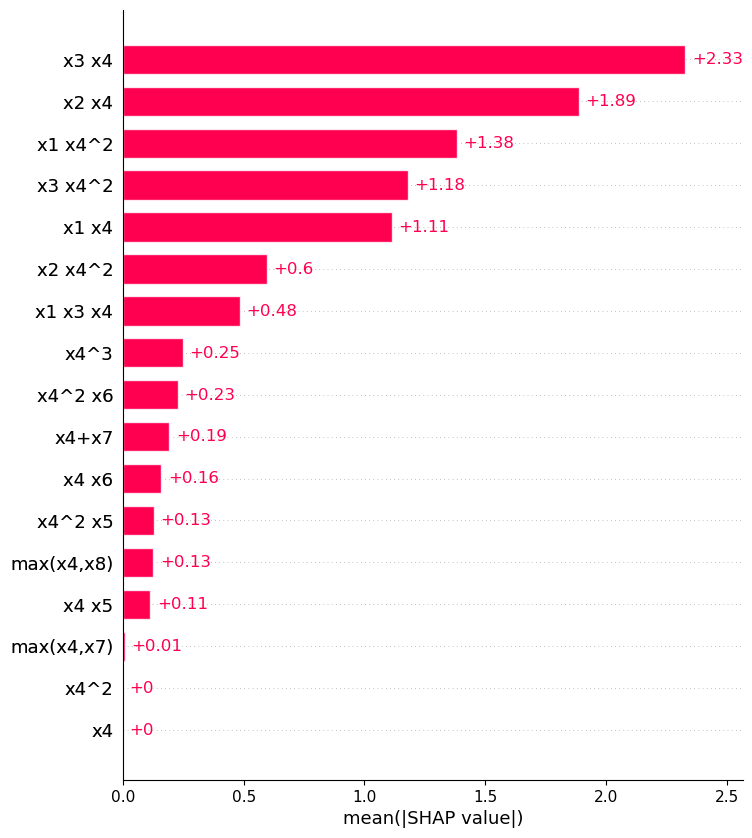

    feature  importance
0     x3 x4    2.329112
1     x2 x4    1.888492
2   x1 x4^2    1.382212
3   x3 x4^2    1.180339
4     x1 x4    1.113923
5   x2 x4^2    0.596257
6  x1 x3 x4    0.484482
7      x4^3    0.247188


In [73]:
f_dados_shap = avaliar_atributos(dados_inter[dados_inter.columns[idx_dados]], dados['y'])


### 4.1.2. Avaliação dos Atributos **Transformados** Interados

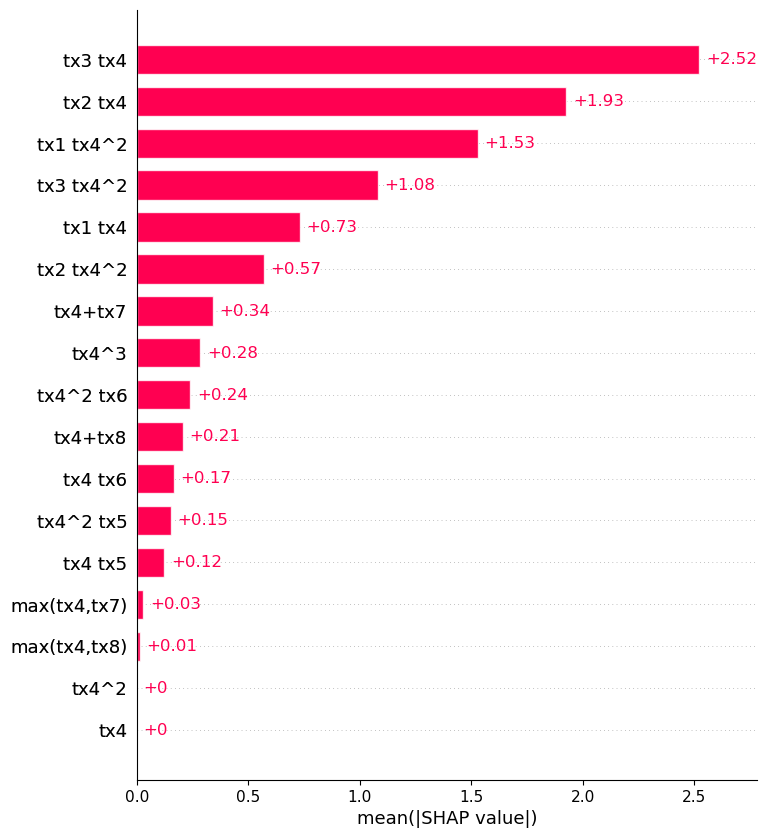

     feature  importance
0    tx3 tx4    2.523920
1    tx2 tx4    1.927302
2  tx1 tx4^2    1.530183
3  tx3 tx4^2    1.080174
4    tx1 tx4    0.732225
5  tx2 tx4^2    0.569122
6    tx4+tx7    0.338987
7      tx4^3    0.283860


In [74]:
f_dados_transformados_shap = avaliar_atributos(dados_transformados_inter[dados_transformados_inter.columns[idx_dados_transform]], dados['y'])

## 4.2. Teste dos Atributos

Testa os dados originais, separados por bins e transformados com todos os atributos. Em seguida testa os mesmos, mas apenas com os melhores atributos definidos na list *col_top*.

In [77]:
def evaluate_model_xgBoost(X, y, id):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f'{id.ljust(20)}|  {mse_train:.3f}  |  {mse:.3f}')

In [80]:
print(f'        Dado        |  Train  | Test ')
print(f'--------------------|---------|-------')
evaluate_model_xgBoost(dados[dados.columns[:-1]], dados['y'], 'Atributos Originais')
evaluate_model_xgBoost(dados_bins, dados['y'], 'Atributos em Bins')
evaluate_model_xgBoost(dados_transformados, dados['y'], 'Atributos Transf.')
print(f'--------------------|---------|-------')
evaluate_model_xgBoost(dados_inter[dados_inter.columns[:8].to_list() + f_dados_shap['feature'].to_list()], dados['y'], 'At. Originais + SHAP')
evaluate_model_xgBoost(dados_transformados_inter[dados_transformados_inter.columns[:8].to_list() + f_dados_transformados_shap['feature'].to_list()], dados['y'], 'At. Transf. + SHAP')
evaluate_model_xgBoost(pd.concat([dados[dados.columns[:-1]], dados_transformados_inter[f_dados_transformados_shap['feature'].to_list()]], axis=1), dados['y'], 'At Orig + Tran SHAP')

        Dado        |  Train  | Test 
--------------------|---------|-------
Atributos Originais |  0.215  |  1.751
Atributos em Bins   |  0.454  |  2.027
Atributos Transf.   |  0.215  |  1.751
--------------------|---------|-------
At. Originais + SHAP|  0.189  |  2.020
At. Transf. + SHAP  |  0.188  |  1.908
At Orig + Tran SHAP |  0.188  |  1.908
